In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# List Model Yang Digunakan
- KNN
- Random Forest
- Support Vector Machine
- XGBoost
- Logistic Regression

In [18]:
import pandas as pd

df = pd.read_csv('water_potability.csv')

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Exploratory Data Analysis

In [19]:
df.shape

(3276, 10)

In [20]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [21]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

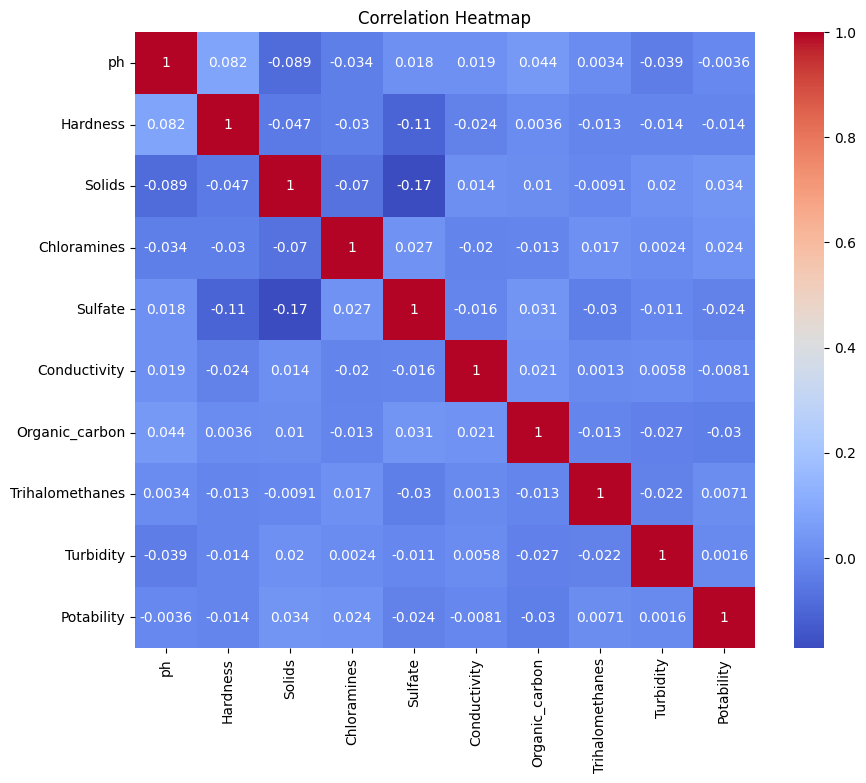

In [22]:
#Correlation Heatmap

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

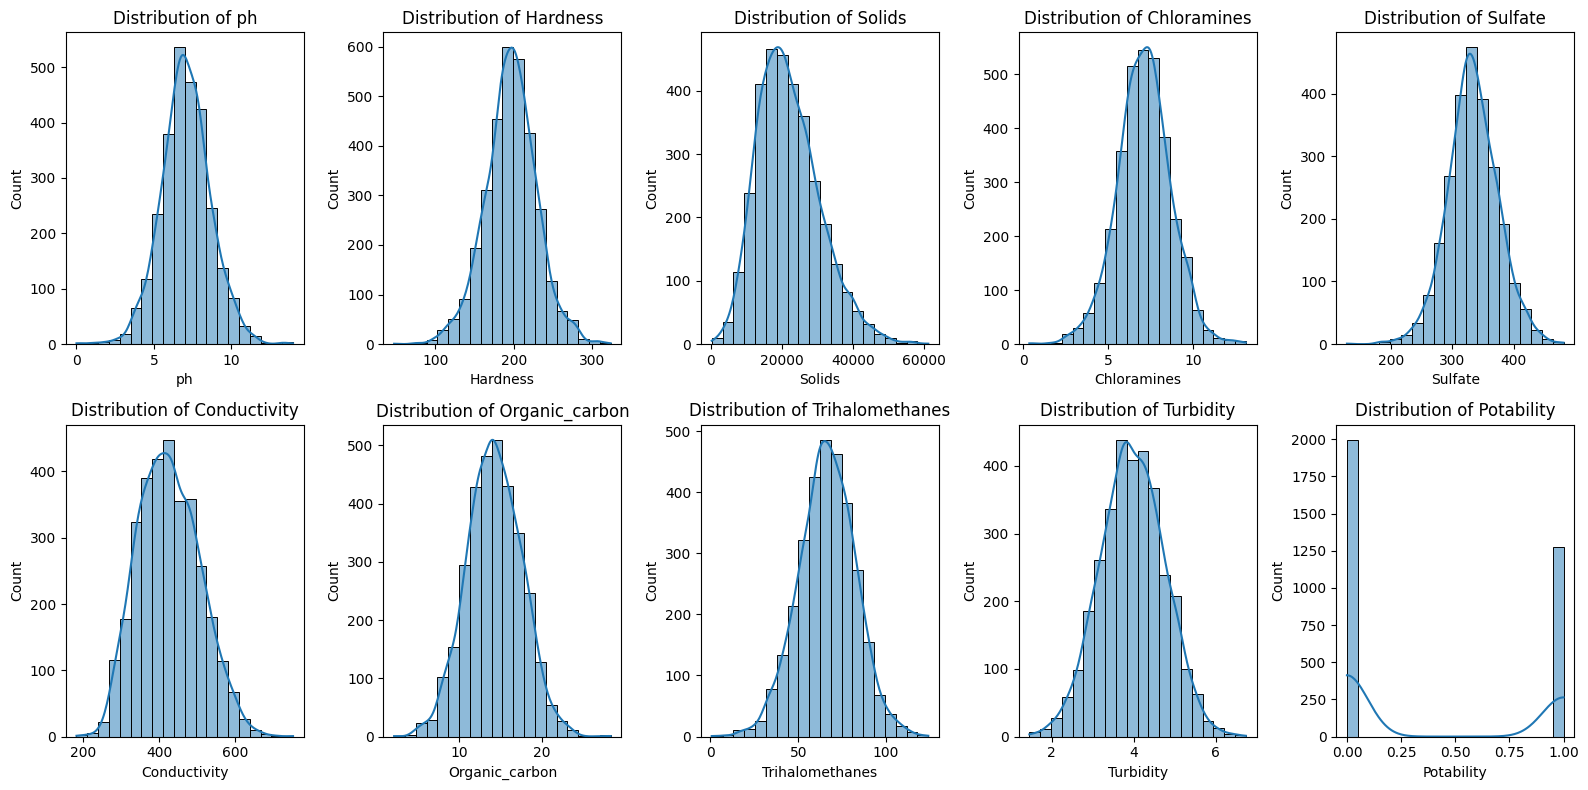

In [23]:
#Histogram Distribution

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Hitung jumlah kolom dan tentukan ukuran grid
num_cols = len(df.columns)
cols = 5  # jumlah kolom grid yang diinginkan
rows = math.ceil(num_cols / cols)

# Buat figure dan axes
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()  # agar bisa diakses sebagai list

# Plot setiap kolom
for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hapus subplot kosong jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


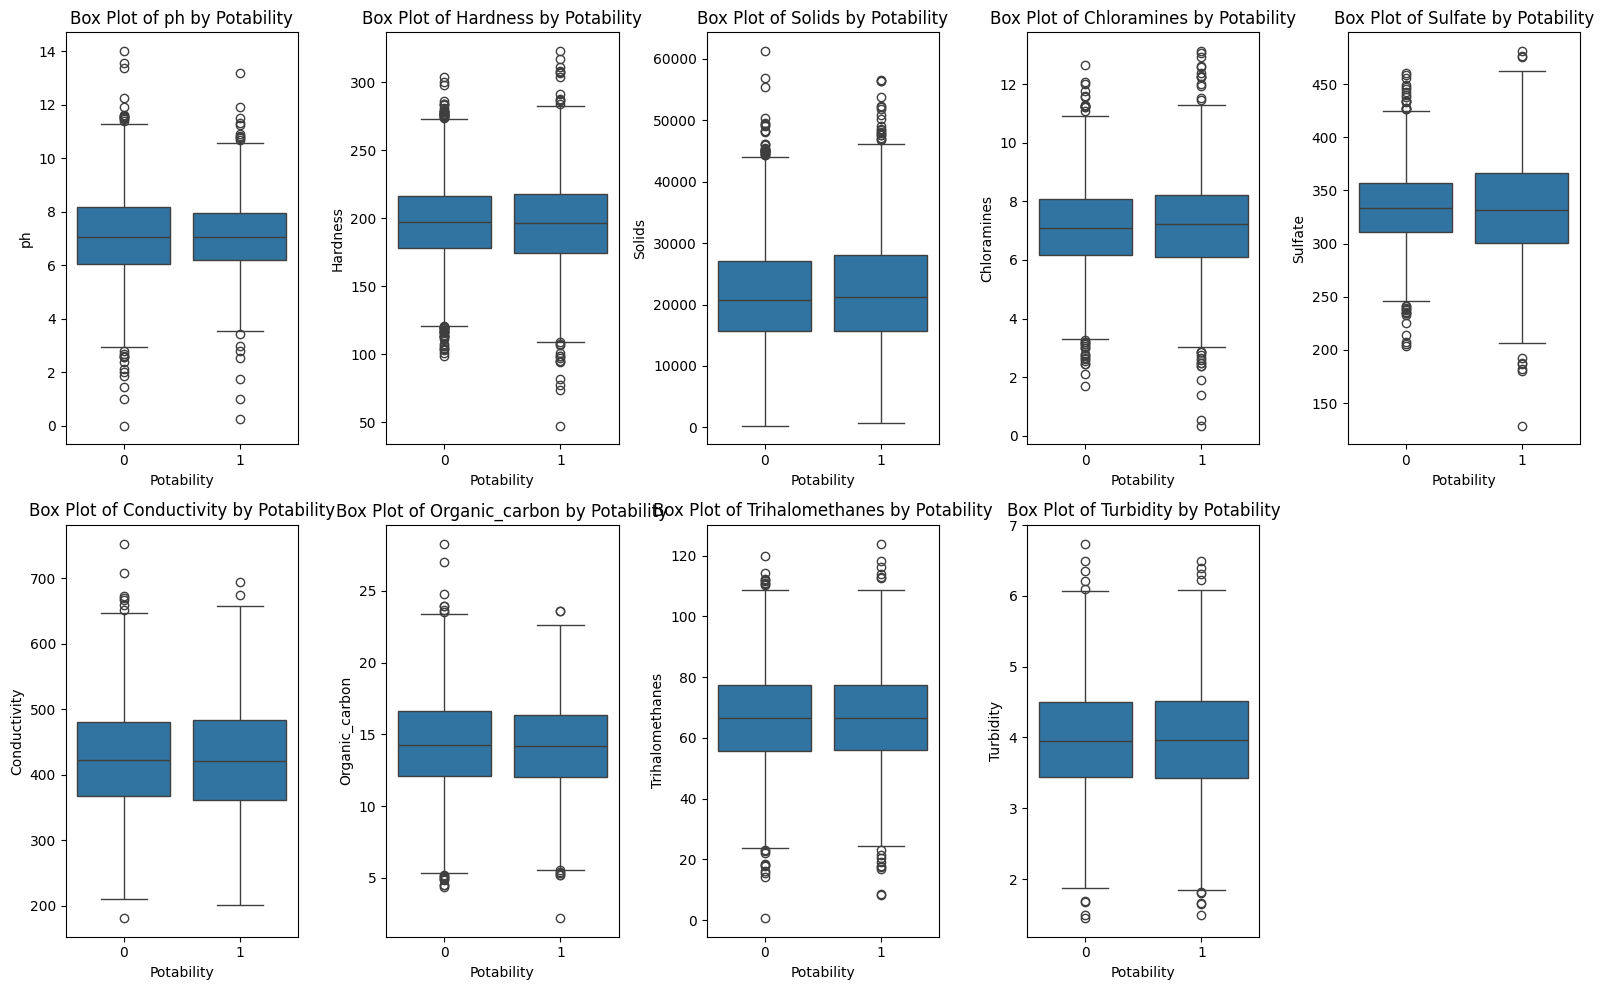

In [24]:
#Boxplot

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Buat list kolom fitur (tanpa kolom target)
feature_cols = [col for col in df.columns if col != 'Potability']

# Hitung jumlah fitur & buat grid
num_cols = len(feature_cols)
cols = 5  # jumlah kolom per baris
rows = math.ceil(num_cols / cols)

# Buat figure dan axes
fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
axes = axes.flatten()

# Plot tiap fitur
for i, col in enumerate(feature_cols):
    sns.boxplot(data=df, x='Potability', y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} by Potability')

# Hapus subplot kosong jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [25]:
#Distribusi Kelas
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

## Preprocessing Data

### Missing Value

In [26]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [27]:
df = df.fillna(df.mean())

In [28]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Split Data

In [29]:
X = df.drop('Potability', axis=1)
y = df['Potability']


### Scaling Data

In [30]:
X.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [32]:
X_scaled.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03
mean,-4.684897e-16,1.024821e-15,-4.012528e-17,5.205441e-16,1.587660e-15,1.708035e-16,2.385827e-17,1.691768e-16,5.487403e-16
std,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00
min,-4.817747e+00,-4.530454e+00,-2.474344e+00,-4.277288e+00,-5.666636e+00,-3.028290e+00,-3.653635e+00,-4.164160e+00,-3.225560e+00
25%,-5.464412e-01,-5.937372e-01,-7.239916e-01,-6.285247e-01,-4.616071e-01,-7.482911e-01,-6.709187e-01,-6.182751e-01,-6.755095e-01
50%,-6.043133e-16,1.819424e-02,-1.238999e-01,5.068209e-03,3.145987e-15,-5.345935e-02,-2.014487e-02,0.000000e+00,-1.507005e-02
75%,5.370064e-01,6.174333e-01,6.066532e-01,6.271058e-01,4.596379e-01,6.878605e-01,6.870970e-01,6.513609e-01,6.837866e-01
max,4.707802e+00,3.855680e+00,4.472689e+00,3.793631e+00,4.074895e+00,4.048144e+00,4.237147e+00,3.653325e+00,3.552921e+00


## Uji Model

### Split Train-Test Data

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### SVM

0.6951219512195121
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       412
           1       0.69      0.32      0.44       244

    accuracy                           0.70       656
   macro avg       0.69      0.62      0.62       656
weighted avg       0.69      0.70      0.66       656



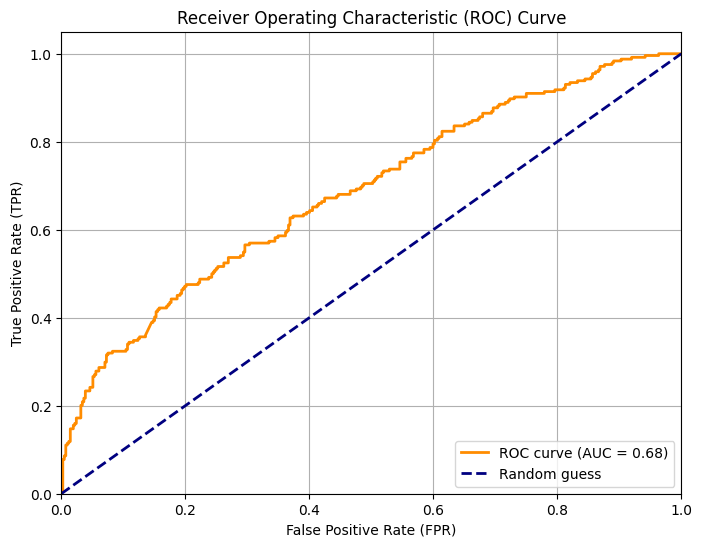

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
svc = SVC(probability=True)
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Plot ROC-AUC
y_prob = svc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Random Forest

0.6829268292682927
              precision    recall  f1-score   support

           0       0.70      0.88      0.78       412
           1       0.63      0.35      0.45       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.61       656
weighted avg       0.67      0.68      0.66       656



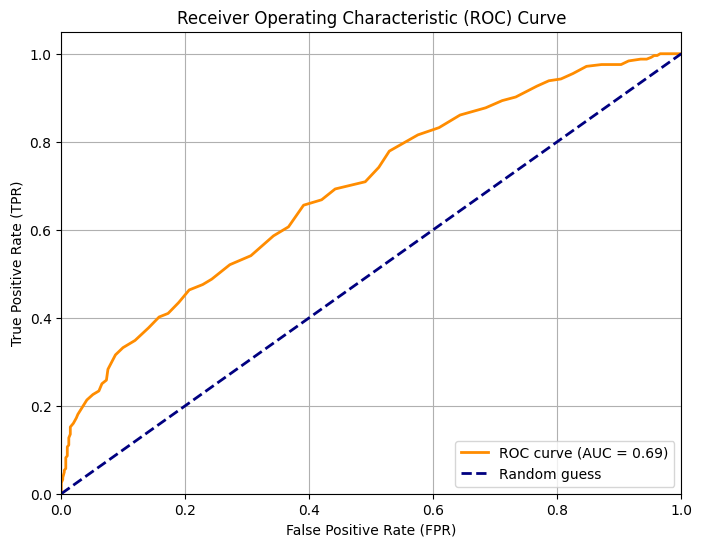

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Plot ROC-AUC
y_prob = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Logistic Regression

0.5
              precision    recall  f1-score   support

           0       0.62      0.51      0.56       412
           1       0.37      0.48      0.42       244

    accuracy                           0.50       656
   macro avg       0.50      0.50      0.49       656
weighted avg       0.53      0.50      0.51       656



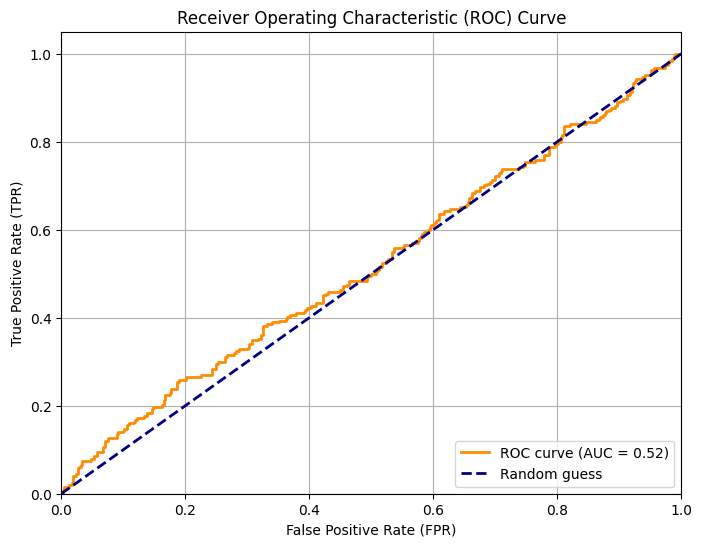

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

#Plot ROC-AUC
y_prob = lr.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### KNN

0.6265243902439024
              precision    recall  f1-score   support

           0       0.68      0.75      0.72       412
           1       0.50      0.41      0.45       244

    accuracy                           0.63       656
   macro avg       0.59      0.58      0.58       656
weighted avg       0.61      0.63      0.62       656



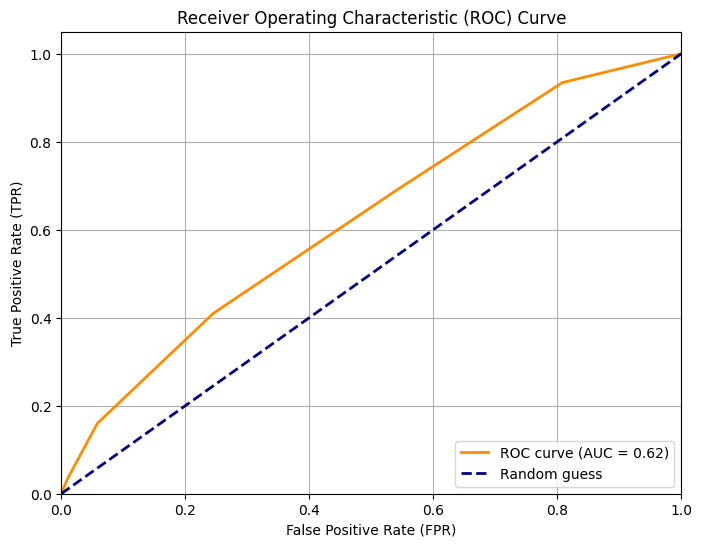

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

#Plot ROC-AUC
y_prob = knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### XGBoost

0.6570121951219512
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       412
           1       0.55      0.43      0.49       244

    accuracy                           0.66       656
   macro avg       0.63      0.61      0.61       656
weighted avg       0.65      0.66      0.65       656



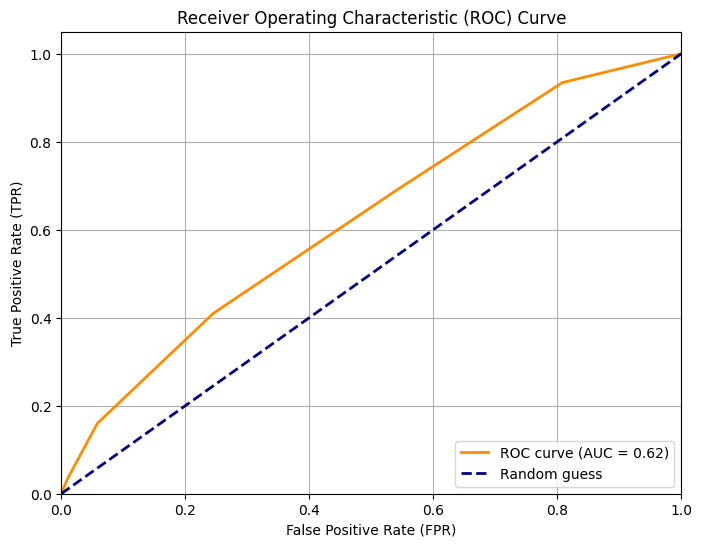

In [38]:
import xgboost as xgb

model = xgb.XGBClassifier(eval_metric='logloss')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

#Plot ROC-AUC
y_prob = knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Model + Hyperparameter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score

### SVM

In [40]:
svm_model = SVC(probability=True)
svm_param = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_grid = GridSearchCV(svm_model, svm_param, cv=skf, scoring='accuracy', n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)

print("SVM Best Params:", svm_grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVM Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


0.6951219512195121
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       412
           1       0.69      0.32      0.44       244

    accuracy                           0.70       656
   macro avg       0.69      0.62      0.62       656
weighted avg       0.69      0.70      0.66       656



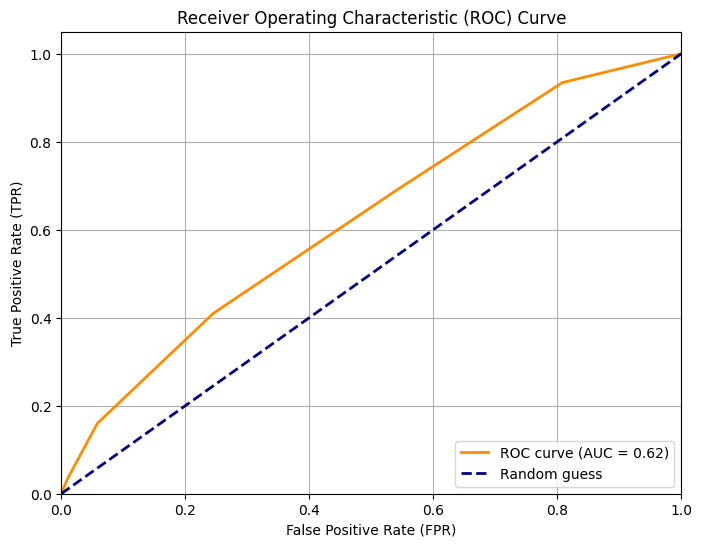

In [41]:
best_model = svm_grid.best_estimator_  
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#ROC-AUC 
y_prob = knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Random Forest

In [42]:
rf_model = RandomForestClassifier()
rf_param = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_grid = GridSearchCV(rf_model, rf_param, cv=skf, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

print("Random Forest Best Params:", rf_grid.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Random Forest Best Params: {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200}


0.6814024390243902
              precision    recall  f1-score   support

           0       0.69      0.88      0.78       412
           1       0.63      0.35      0.45       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.61       656
weighted avg       0.67      0.68      0.65       656



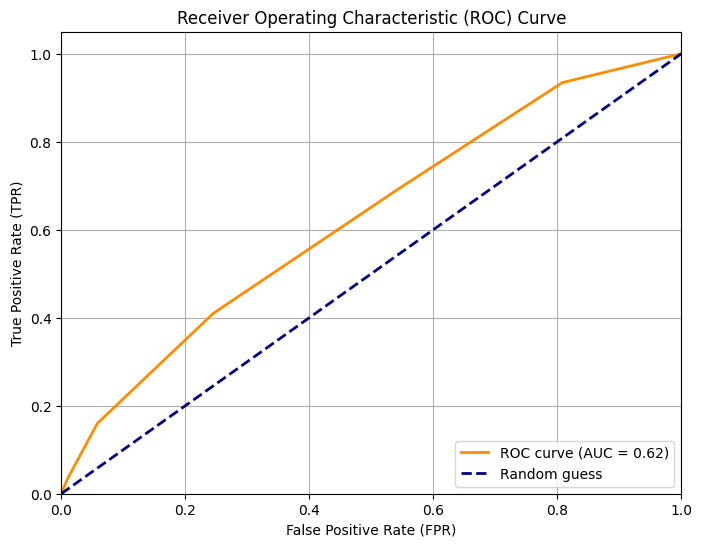

In [43]:
best_model = rf_grid.best_estimator_  
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#ROC-AUC 
y_prob = knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Logistic Regression

In [44]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_param = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
logreg_grid = GridSearchCV(logreg_model, logreg_param, cv=skf, scoring='accuracy', n_jobs=-1, verbose=1)
logreg_grid.fit(X_train, y_train)

print("Logistic Regression Best Params:", logreg_grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Logistic Regression Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


0.6280487804878049
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



d:\.Portofolio\Coding\water-potability\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\.Portofolio\Coding\water-potability\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\.Portofolio\Coding\water-potability\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

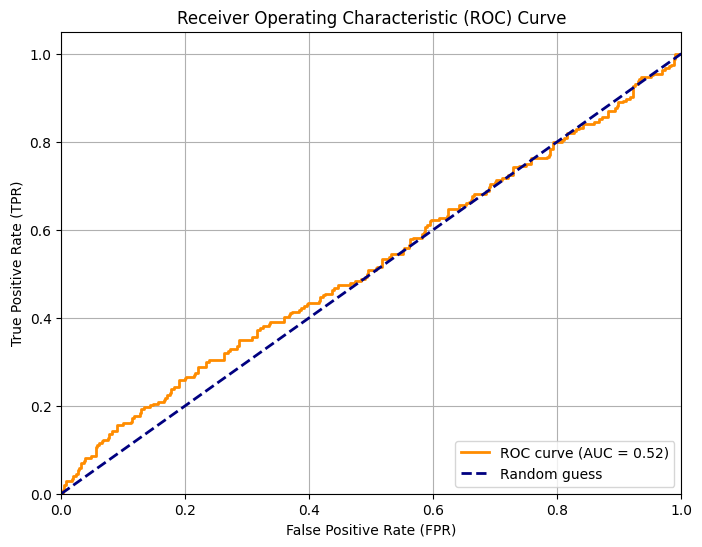

In [45]:
best_model = logreg_grid.best_estimator_  
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#ROC-AUC 
y_prob = logreg_grid.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### KNN

In [46]:
knn_model = KNeighborsClassifier()
knn_param = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn_grid = GridSearchCV(knn_model, knn_param, cv=skf, scoring='accuracy', n_jobs=-1, verbose=1)
knn_grid.fit(X_train, y_train)

print("KNN Best Params:", knn_grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
KNN Best Params: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}


0.6402439024390244
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       412
           1       0.53      0.34      0.42       244

    accuracy                           0.64       656
   macro avg       0.60      0.58      0.58       656
weighted avg       0.62      0.64      0.62       656



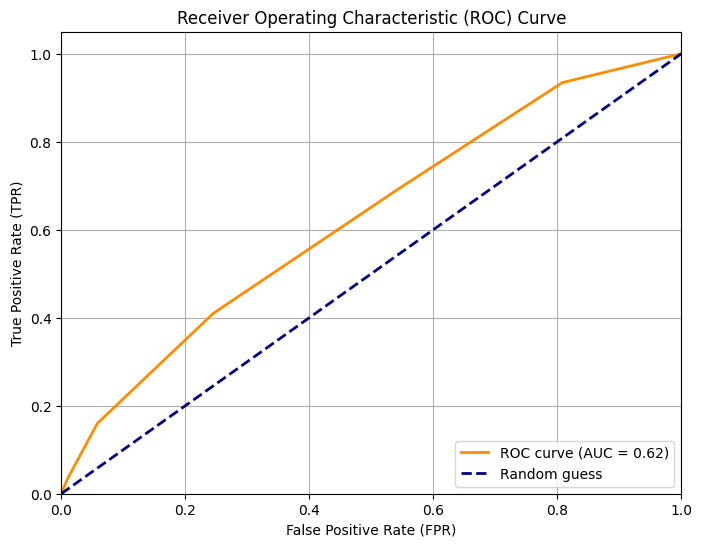

In [47]:
best_model = knn_grid.best_estimator_  
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#ROC-AUC 
y_prob = knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### XGBoost

In [48]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_param = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb_model, xgb_param, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)

print("XGBoost Best Params:", xgb_grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}


d:\.Portofolio\Coding\water-potability\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:16:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.6859756097560976
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       412
           1       0.65      0.34      0.44       244

    accuracy                           0.69       656
   macro avg       0.67      0.61      0.61       656
weighted avg       0.68      0.69      0.66       656



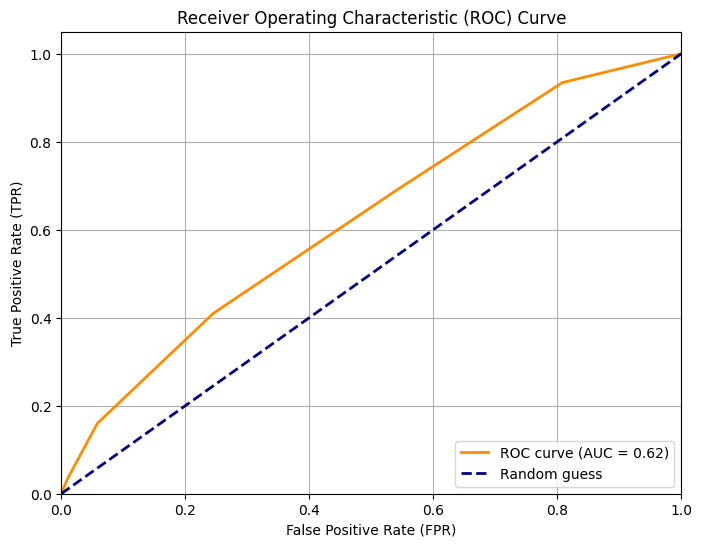

In [49]:
best_model = xgb_grid.best_estimator_  
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#ROC-AUC 
y_prob = knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Optuna

### SVM

In [50]:
import optuna
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# --- Preprocessing (dari sebelumnya)
X = df.drop('Potability', axis=1)
y = df['Potability']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# --- Optuna objective function
def objective(trial):
    C = trial.suggest_loguniform('C', 0.01, 100)
    gamma = trial.suggest_loguniform('gamma', 0.0001, 1.0)
    
    model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

# --- Run Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# --- Best Result
print("Best trial:")
print(study.best_trial.params)

# --- Evaluate Final Model
best_params = study.best_trial.params
final_model = SVC(kernel='rbf', **best_params)
final_model.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = final_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

d:\.Portofolio\Coding\water-potability\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-05-28 03:16:13,377] A new study created in memory with name: no-name-5bdca46c-686f-480d-a5d5-cf55ea087ac2
C:\Users\steve\AppData\Local\Temp\ipykernel_19252\2122578821.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.01, 100)
C:\Users\steve\AppData\Local\Temp\ipykernel_19252\2122578821.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_l

Best trial:
{'C': 47.63408900666961, 'gamma': 0.9586938870754799}

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       400
           1       0.79      0.68      0.73       400

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



### Random Forest

[I 2025-05-28 03:16:27,621] A new study created in memory with name: no-name-7c8ced0b-e1bf-42f5-a975-2a5da0d63057


[I 2025-05-28 03:16:29,619] Trial 0 finished with value: 0.6725 and parameters: {'n_estimators': 279, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.6725.
[I 2025-05-28 03:16:32,863] Trial 1 finished with value: 0.725 and parameters: {'n_estimators': 364, 'max_depth': 16, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.725.
[I 2025-05-28 03:16:33,847] Trial 2 finished with value: 0.64375 and parameters: {'n_estimators': 196, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.725.
[I 2025-05-28 03:16:35,725] Trial 3 finished with value: 0.7175 and parameters: {'n_estimators': 210, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 1 with value: 0.725.
[I 2025-05-28 03:16:37,217] Trial 4 finished with value: 0.64 and parameters: {'n_estimators': 2

Best trial:
{'n_estimators': 464, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       400
           1       0.75      0.75      0.75       400

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



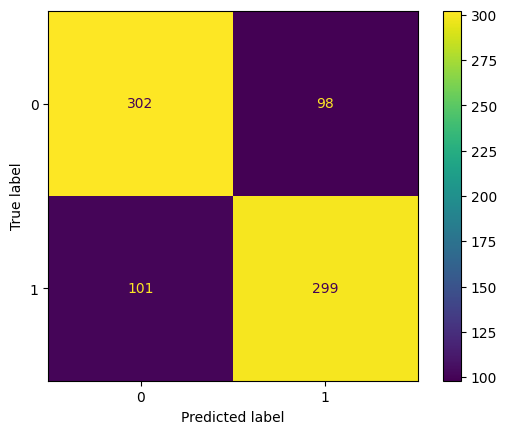

In [51]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# --- Preprocessing
X = df.drop('Potability', axis=1)
y = df['Potability']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# --- Optuna objective function for Random Forest
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

# --- Run Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# --- Best Result
print("Best trial:")
print(study.best_trial.params)

# --- Evaluate Final Model
best_params = study.best_trial.params
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# (Optional) Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()


### KNN

[I 2025-05-28 03:18:03,954] A new study created in memory with name: no-name-7b009cf3-b54f-4f98-8110-f1f66b49aa17
[I 2025-05-28 03:18:04,017] Trial 0 finished with value: 0.6475 and parameters: {'n_neighbors': 9, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0 with value: 0.6475.
[I 2025-05-28 03:18:04,079] Trial 1 finished with value: 0.6375 and parameters: {'n_neighbors': 12, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 0 with value: 0.6475.
[I 2025-05-28 03:18:04,133] Trial 2 finished with value: 0.655 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 2 with value: 0.655.
[I 2025-05-28 03:18:04,178] Trial 3 finished with value: 0.675 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 3 with value: 0.675.
[I 2025-05-28 03:18:04,238] Trial 4 finished with value: 0.67375 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 3 w

Best trial:
{'n_neighbors': 4, 'weights': 'distance', 'metric': 'minkowski'}

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       400
           1       0.70      0.80      0.75       400

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800



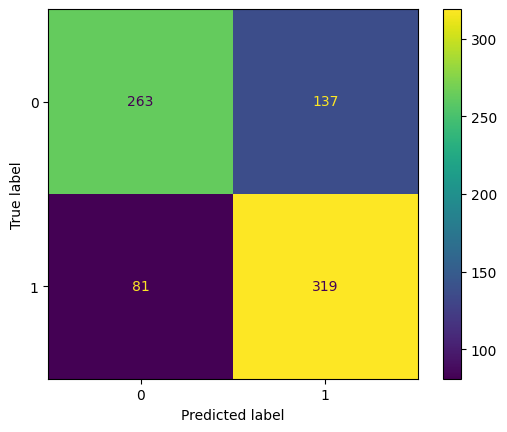

In [52]:
import optuna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# --- Preprocessing
X = df.drop('Potability', axis=1)
y = df['Potability']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# --- Optuna objective function for KNN
def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 3, 25)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])

    model = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        metric=metric
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

# --- Run Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# --- Best Result
print("Best trial:")
print(study.best_trial.params)

# --- Evaluate Final Model
best_params = study.best_trial.params
final_model = KNeighborsClassifier(**best_params)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# (Optional) Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()


### Logistic Regression

[I 2025-05-28 03:18:05,475] A new study created in memory with name: no-name-73da39f1-f856-48bb-a857-6f1e44d937d5
C:\Users\steve\AppData\Local\Temp\ipykernel_19252\1325897758.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 100)
[I 2025-05-28 03:18:05,494] Trial 0 finished with value: 0.50875 and parameters: {'C': 0.11248687826662568, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 0 with value: 0.50875.
C:\Users\steve\AppData\Local\Temp\ipykernel_19252\1325897758.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 100)
[I 2025-05-28 03:18:05,509] Trial 1 finished with value: 0.50875 

Best trial:
{'C': 0.11248687826662568, 'penalty': 'l2', 'solver': 'saga'}

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       400
           1       0.51      0.51      0.51       400

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.51       800
weighted avg       0.51      0.51      0.51       800



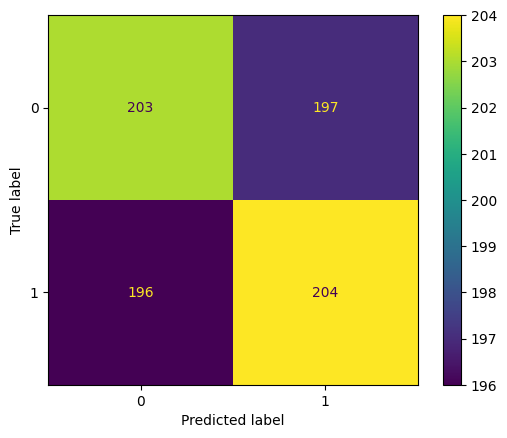

In [53]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# --- Preprocessing
X = df.drop('Potability', axis=1)
y = df['Potability']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# --- Optuna objective function for Logistic Regression
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 100)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])

    # Beberapa solver tidak mendukung penalty tertentu
    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        raise optuna.exceptions.TrialPruned()

    model = LogisticRegression(
        C=C,
        penalty=penalty,
        solver=solver,
        max_iter=1000,
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

# --- Run Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# --- Best Result
print("Best trial:")
print(study.best_trial.params)

# --- Evaluate Final Model
best_params = study.best_trial.params
final_model = LogisticRegression(**best_params, max_iter=1000, random_state=42)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# (Optional) Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()


### XGBoost

[I 2025-05-28 03:18:06,032] A new study created in memory with name: no-name-beb88121-ded5-4f64-8de9-8c144ca5b161
C:\Users\steve\AppData\Local\Temp\ipykernel_19252\3951760674.py:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\steve\AppData\Local\Temp\ipykernel_19252\3951760674.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\steve\AppData\Local\Temp\ipykernel_19252\3951760674.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0

Best trial:
{'n_estimators': 223, 'max_depth': 9, 'learning_rate': 0.12098760589923903, 'subsample': 0.7244596730987415, 'colsample_bytree': 0.6841935349686472, 'gamma': 0.015437721184855712}

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       400
           1       0.73      0.70      0.72       400

    accuracy                           0.72       800
   macro avg       0.72      0.72      0.72       800
weighted avg       0.72      0.72      0.72       800



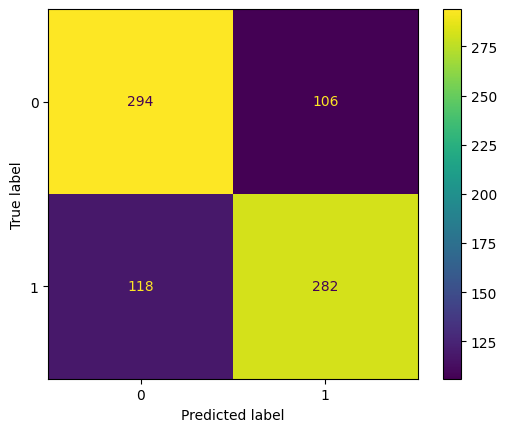

In [54]:
import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# --- Preprocessing
X = df.drop('Potability', axis=1)
y = df['Potability']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# --- Optuna objective function for XGBoost
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'random_state': 42
    }

    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

# --- Run Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# --- Best Result
print("Best trial:")
print(study.best_trial.params)

# --- Evaluate Final Model
best_params = study.best_trial.params
best_params.update({'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42})

final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# (Optional) Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
